# Parte 1 - Instalação e Teste do NLTK

Tutorial adaptado de [Lady Aurora](https://medium.com/@maelyalways) por Daniel Hasan Dalip e Diego Ascânio Santos. O original está disponível [aqui](https://medium.com/@maelyalways/nltk-tutorial-8175e57fbfda)

## O que é o NLTK?

NLTK (Natural Language ToolKit) é uma biblioteca de Python utilizada para natural language processing (NLP), que é, de forma resumida, o processo para desenvolver algoritmos capazes de “entender” a linguagem humana. Atividades simples para nós, como resumir um texto, associar palavras que têm alguma relação, como pássaro e ninho, ou dizer quem é que está praticando a ação descrita pelo verbo tornam-se muito mais complicadas quando pretendemos passar essas tarefas para uma máquina.

Para facilitar esse trabalho foram desenvolvidas plataformas como a NLTK que tem como objetivo proporcionar as ferramentas necessárias para estudos e pesquisas na área, além de ser utilizada para ensinar NLP e temas relacionados.

## 1. Instalação NLTK

In [1]:
!pip install nltk

You should consider upgrading via the '/home/diego/MMC/oficinas-4.0/segundo-semestre/venv/bin/python -m pip install --upgrade pip' command.


## 2. Download de Pacotes do NLTK

Ao abrir o nltk downloader escolha a opção all e clique em **Download**

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

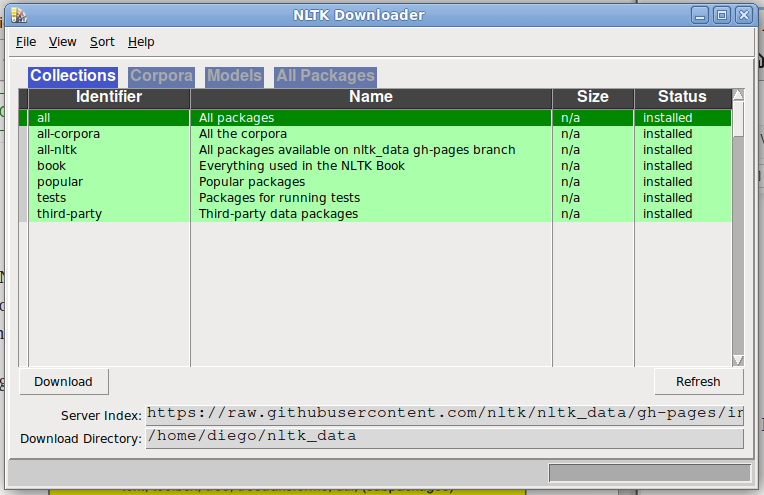

Feche a janela após o download concluir

## 3. Aplicações do NLTK

O NLTK fornece classes básicas para representar dados relevantes ao processamento de texto; interfaces padrão para executar tarefas, análise sintática e classificação textual.

Algumas funções que você pode usar nesta biblioteca são:

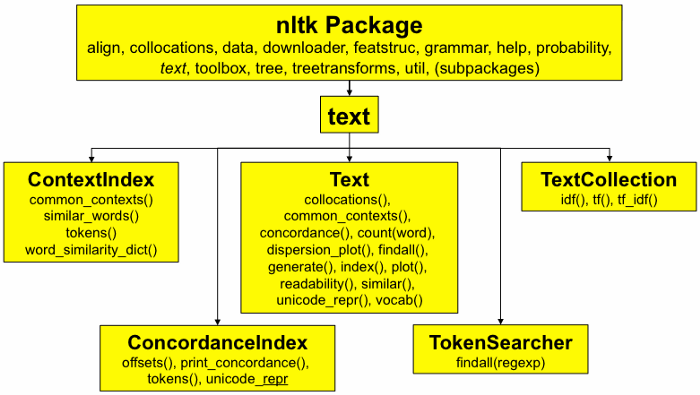

### Tokenize

O primeiro processo a ser aprendido é o de tokenização, que consiste em separar um texto em partes menores.

Veja como separar um texto por frases (sentenças). Para isso, a função sent_tokenize será utilizada!

#### Separação do Texto em Sentenças

In [29]:
texto  = 'Estamos aprendendo a usar a biblioteca NTLK. '
texto += 'Esperamos sair deste tutorial sabendo o básico. '
texto += 'Bons estudos!'

from nltk.tokenize import sent_tokenize
sentencas = sent_tokenize(
    texto,
    'portuguese'
)

print(sentencas)

['Estamos aprendendo a usar a biblioteca NTLK.', 'Esperamos sair deste tutorial sabendo o básico.', 'Bons estudos!']


Não é esperado encontrar problemas com vírgulas, pontos ou pronomes de tratamento como Sr. e Sra, tampouco ao dividir sentenças de outras línguas suportadas pelo NLTK.

O que pode ocorrer são erros em abreviações como por exemplo:

In [30]:
texto = 'Resido na Al. Ezequiel Dias na esquina com a Av. Carandaí'
sentencas = sent_tokenize(
    texto,
    'portuguese'
)
print(sentencas)

['Resido na Al.', 'Ezequiel Dias na esquina com a Av. Carandaí']


#### Separação do Texto em Palavras

Além de separar textos em sentenças, também é possível separá-los (*tokenizá-los*) em palavras, através do método *word_tokenize* presente em **nltk.tokenize**:

In [31]:
from nltk.tokenize import word_tokenize

texto  = 'Estamos aprenendo a usar a biblioteca NTLK. '
texto += 'Esperamos sair deste tutorial sabendo o básico. '
texto += 'Bons estudos!'

palavras = word_tokenize(
    texto,
    'portuguese'
)

print(palavras)

['Estamos', 'aprenendo', 'a', 'usar', 'a', 'biblioteca', 'NTLK', '.', 'Esperamos', 'sair', 'deste', 'tutorial', 'sabendo', 'o', 'básico', '.', 'Bons', 'estudos', '!']


#### Sinônimos

É possível também encontrar sinônimos e suas definições através do método de conjunto(s) de sinônimos **wordnet.synsets**, que gera uma lista de palavra(s) sinônima(s) à palavra consultada:

In [32]:
# sinonimo(s) para a palavra amor (love) em inglês
from nltk.corpus import wordnet
sinonimos = wordnet.synsets('love')
print(sinonimos)

[Synset('love.n.01'), Synset('love.n.02'), Synset('beloved.n.01'), Synset('love.n.04'), Synset('love.n.05'), Synset('sexual_love.n.02'), Synset('love.v.01'), Synset('love.v.02'), Synset('love.v.03'), Synset('sleep_together.v.01')]


#### Definições

Para encontrar a definição de um dos sinônimos encontrados, basta escolher um índice do array de sinônimos e usar o método **definition()**:

In [33]:
indice = 0
definicao = sinonimos[indice].definition()
print(definicao)

a strong positive emotion of regard and affection


#### Exemplos

Para ter acessos a exemplos da aplicação de um dos sinônimos encontrados, novamente deve-se escolher um índice do array sinônimos, mas, usar o método **examples()**:

In [34]:
indice = 0
exemplo = sinonimos[indice].examples()
print(exemplo)

['his love for his work', 'children need a lot of love']


### Stemming

Após aprender o processo de tokenização, é necesário aprender meios de reduzir as palavras a formas mais simples, um processo conhecido como stemização (ou *stemming*).

Este processo basicamente consiste em remover os afixos de uma palavra para que esta seja reduzida a uma forma mais simples sem necessariamente apresentar uma forma reduzida (*stem* ou tronco) idêntica à sua raíz morfológica.

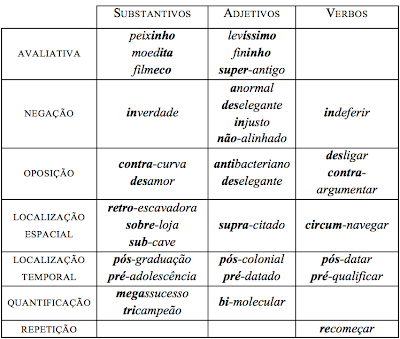

Na imagem acima temos os afixos (em negrito) a serem removidos após o processo de stemmização para encontrar as formas simplificadas das palavras.

Na biblioteca NLTK a stemmização é realizada através das classes Stemmer (*PorterStemmer*, *SnowballStemmer*) contidas no pacote **nltk.stem**.

O exemplo abaixo mostra a stemmização da palavra loving:

In [35]:
from nltk.stem import PorterStemmer

palavra = 'loving'
stemmer = PorterStemmer()
stemmização = stemmer.stem(palavra)
resultado = 'Stemmização da palavra {}: {}'.format(
    palavra,
    stemmização
)
print(resultado)

Stemmização da palavra loving: love


É possível realizar stemmização para palavras de outras línguas suportadas pelo NLTK através da classe *SnowballStemmer*

O atributo **languages** presente em *SnowballStemmer* mostra as línguas suportadas:

In [17]:
from nltk.stem import SnowballStemmer
linguas_suportadas = SnowballStemmer.languages
print('Línguas Suportadas: {}'.format(linguas_suportadas))

Línguas Suportadas: ('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


Para realizar stemmização em um dos idiomas suportados, é necessário instanciar um objeto da classe SnowballStemmer, passando no parâmetro o idioma suportado escolhido e em seguida, realizar a stemmização de uma palavra qualquer através do método **stem()**:

In [18]:
idioma = 'portuguese'
palavra = 'dançando'

stemmer = SnowballStemmer(idioma)
stemmização = stemmer.stem(palavra)

resultado = 'Stemmização da palavra {}: {}'.format(
    palavra,
    stemmização
)
print(resultado)

Stemmização da palavra dançando: danc


#### Lemmatizing

Nem sempre a Stemmização consegue reduzir as palavras para sua forma correta, como no caso do exemplo acima, onde a palavra dancando foi reduzida para danc, quando sua forma reduzida correta seria danca.

Nesses casos, é possível tentar outra técnica de redução de palavras semelhante à stemmização conhecida como **Lematização**.

O que difere as duas técnicas é que enquanto a stemmização busca reduzir uma palavra a seu tronco (a partir da remoção de afixos) a lematização busca reduzir essa palavra através de um processo de deflexão até alcançar o seu **lema**, que é sua forma breve.

Tomando as palavras gatos, gatas, gato e gata, todas elas apresentam como lema (forma breve) a palavra gato.

E tomando as flexões do verbo ter: tinham, temos, tiver, tem, dentre outras formas, todas elas apresentam como lema a palavra ter.

Infelizmente, o NLTK não oferece por padrão um lemmatizer que suporte nativamente o idioma português. Existe uma biblioteca que demanda uma versão específica do NLTK (3.4.5) chamada [NLPyPort](https://pypi.org/project/NLPyPort/) que oferece melhor suporte aos recursos da língua portuguesa, inclusive de lematização.

Em futuras versões deste tutorial pretende-se abordar a lemmatização de palavras em português através desta biblioteca. Por hora, é suficiente aplicar lematização a palavras em inglês para a compreensão deste processo.

A biblioteca padrão NLTK oferece em seu pacote nltk.stem o lematizador *WordNetLemmatizer* e seu uso é exemplificado abaixo:

In [24]:
from nltk.stem import WordNetLemmatizer
word = 'believes'
lemmatizer = WordNetLemmatizer()
lemmatizacao = lemmatizer.lemmatize(word)

resultado = 'Lemmatização da palavra {}: {}'.format(
    word,
    lemmatizacao
)
print(resultado)

Lemmatização da palavra believes: belief


#### Stopwords

As técnicas de Stemmização e Lematização efetuam uma grande melhoria textual na simplificação das palavras (e consequente facilitação) do conteúdo textual para o processamento computacional. Entretanto, apesar destes processos ainda existem nos textos um grande conjunto de palavras que não agregam valor a ele como pronomes, preposições, conectivos, dentre outras. Portanto estas palavras podem (e devem) ser removidas para facilitar o processamento. Pelo fato de possuírem pouco valor semântico, recebem um nome especial: **stopwords**

O NLTK fornece essas palavras através do ente *stopwords* presente no módulo **nltk.corpus**. As linguagens cujas stopwords são suportadas pelo NLTK são:

In [28]:
from nltk.corpus import stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


Como é possível observar, o NLTK possui **stopwords** em português. Assim, stopwords em português serão carregadas e removidas de um texto para verificar esta aplicação que facilita processamento textual.

In [38]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stw = stopwords.words('portuguese')
stw = set(stw)

palavras = word_tokenize(texto)
filtro = []
for palavra in palavras:
    if palavra not in stw:
        filtro.append(palavra)
print(filtro)

['Estamos', 'aprenendo', 'usar', 'biblioteca', 'NTLK', '.', 'Esperamos', 'sair', 'deste', 'tutorial', 'sabendo', 'básico', '.', 'Bons', 'estudos', '!']


Como afirmado, palavras que não agregam valor ao texto são removidas como pronomes, preposições, artigos e conectivos.